In [8]:
# basic
import os
import warnings
import numpy as np
import pandas as pd
from tqdm import tqdm
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
# plot
import seaborn as sns
import matplotlib.pyplot as plt

In [9]:
warnings.filterwarnings('ignore')
sns.set_style("whitegrid")
sns.axes_style("whitegrid")
plt.style.use('seaborn-whitegrid')
pd.set_option('display.float_format', '{:.2f}'.format)

In [10]:
df_sample = pd.read_csv(f'../../outputs/classification/node/exp_ii/inferences/gcn_2_predictions.csv')
df_sample.head()

,y_true,y_pred,prob
0,0.00,0,0.21
1,1.00,1,0.56
2,0.00,0,0.14
3,0.00,0,0.05
4,0.00,0,0.02


In [11]:
df_sample.y_pred.value_counts(dropna=False)

0    214
1     68
Name: y_pred, dtype: int64

In [ ]:
../../outputs/classification/edges/

In [15]:
def roc_model(model):
    mean_fpr = np.linspace(0, 1, 100)
    tprs = []
    aucs = []
    for i in range(1, 11):
        df = pd.read_csv(f'../../outputs/classification/edges/exp_ii/inferences/{model}_{i}_predictions.csv')
        fpr, tpr, _ = metrics.roc_curve(df.y_true, df.prob, pos_label=1)
        
        interp_tpr = np.interp(mean_fpr, fpr, tpr)
        interp_tpr[0] = 0.0
        tprs.append(interp_tpr)
        aucs.append(auc(fpr, tpr))
    
    mean_tpr = np.mean(tprs, axis=0)
    mean_tpr[-1] = 1.0
    mean_auc = auc(mean_fpr, mean_tpr)
    std_auc = np.std(aucs)
    
    return mean_auc, std_auc, mean_fpr, mean_tpr

In [16]:
models = ['gcn', 'cheb', 'sage', 'gat']

name_models = {'gcn': 'GCN', 
               'cheb':'CHEB',
               'sage':'SAGE',
               'gat':'GAT'}

color_models = {'gcn': '#9A86A4', 
                'cheb':'#E2C2B9',
                'sage':'#555555',
                'gat':'#A1CAE2'}

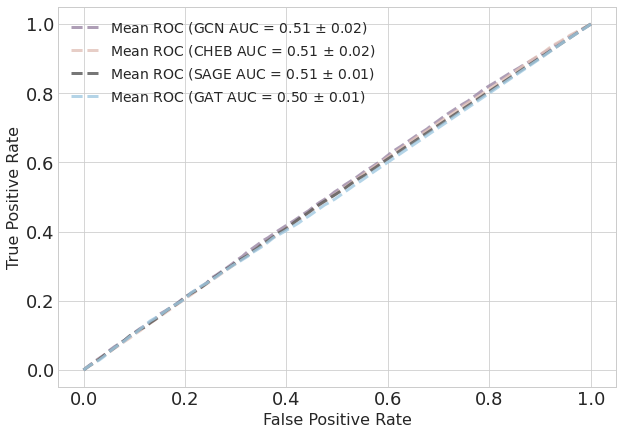

In [18]:
 fig, ax = plt.subplots(figsize=(10,7))
for model in models:
        mean_auca, std_auca, mean_fpra, mean_tpra = roc_model(model)
        ax.plot(
            mean_fpra,
            mean_tpra,
            '--',
            label=r"Mean ROC (%0.25s AUC = %0.2f $\pm$ %0.2f)" % (name_models[model], mean_auca, std_auca),
            lw=3,
            alpha=0.8,
            color=color_models[model]
        )

#ax.plot([0, 1], [0, 1], linestyle="-", lw=3, color="r", alpha=0.8)
plt.xlabel("False Positive Rate", fontsize=16)
plt.ylabel("True Positive Rate", fontsize=16)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
ax.legend(fontsize=18)
ax.legend(loc="best", fontsize=14)

plt.savefig(f'edge_clasification_roc.png', dpi=300, bbox_inches='tight')
plt.show()